In [3]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

#### 主要函数
1. gdal.Open()
2. .RasterXSize, .RasterYSize, .RasterCount
3. .GetGeoTransform(),获得地理转换参数
4. .GetProjection(),投影信息
5. .GetRasterBand(),获取波段
6. .ReadAsArray(),将波段读出为np.array()

In [7]:
path_img = 'E:\QGIS Data\s2_chenggong_6bands.tif'


In [8]:
dset = gdal.Open(path_img)
x_size,y_size,num_band = dset.RasterXSize,dset.RasterYSize,dset.RasterCount
print('column,raw,count:',x_size,y_size,num_band)



column,raw,count: 1490 1630 6


In [9]:
band = dset.GetRasterBand(1)
band_array = band.ReadAsArray()
band_array.shape

(1630, 1490)

In [10]:
geo_trans = dset.GetGeoTransform()
print(geo_trans)


(874420.0, 20.0, 0.0, 2769600.0, 0.0, -20.0)


In [11]:
proj = dset.GetProjection()
print(proj)


PROJCS["WGS 84 / UTM zone 47N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",99],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


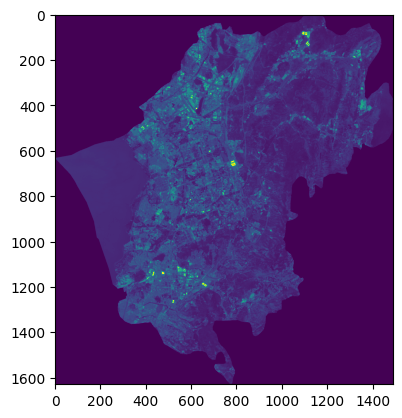

In [12]:
plt.figure()
plt.imshow(band_array,vmax=4000,vmin=0)


#### 2、写出红光波段
gdal.GetDriverByName():创建文件驱动     
.Create(),创建文件     
.SetGeoTransform(),设置地理转换参数    
.SetProjection(),设置投影    
.WriteArray(),将波段数组写入波段    
.SetNoDataValue():数据压缩作用   


In [15]:
path_out = 'E:\QGIS Data\shanger1\chenggong_red.tif'


In [16]:
driver = gdal.GetDriverByName('GTiff')
outset = driver.Create(path_out,xsize=dset.RasterXSize,ysize=dset.RasterYSize,bands=1,eType=gdal.GDT_Int16)
outset.SetGeoTransform(geo_trans)
outset.SetProjection(proj)
band_red = dset.GetRasterBand(3)
band_red_array = band_red.ReadAsArray()
band_out = outset.GetRasterBand(1)
band_out.WriteArray(band_red_array)
band_out.SetNoDataValue(np.nan)

outset = None